In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
df=pd.read_csv("housing.csv")

In [3]:
boston=load_boston()

/home/chetan/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [7]:
data = pd.DataFrame(boston.data)

In [8]:
data.columns=boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
data['PRICE']=boston.target
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [10]:
x=data.drop(['PRICE'],axis=1)
y=data['PRICE']

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
import sklearn
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
model=lm.fit(xtrain, ytrain)

In [13]:
ytrain_pred=lm.predict(xtrain)
ytest_pred=lm.predict(xtest)

In [14]:
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(ytest,ytest_pred)
print(mse)
mse=mean_squared_error(ytrain_pred,ytrain)
print(mse)

33.44897999767638
19.32647020358573


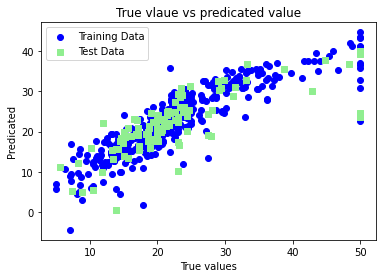

In [16]:
plt.scatter(ytrain,ytrain_pred,c='blue',marker='o',label='Training Data')
plt.scatter(ytest,ytest_pred,c='lightgreen',marker='s',label='Test Data')
plt.xlabel('True values')
plt.ylabel('Predicated')
plt.title('True vlaue vs predicated value')
plt.legend(loc='upper left')
plt.plot()
plt.show()

# Synthesis

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
x = np.array([95,85,80,70,60])
y = np.array([85,95,70,65,70])

In [20]:
model = np.polyfit(x, y, 1)
print(model)

[ 0.64383562 26.78082192]


In [21]:
predict = np.poly1d(model)
predict(65)

68.63013698630135

In [22]:
y_pred = predict(x)
print(y_pred)

[87.94520548 81.50684932 78.28767123 71.84931507 65.4109589 ]


In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y, y_pred)

0.4803218090889323

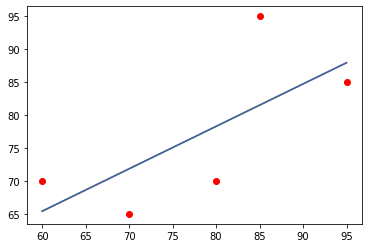

In [25]:
y_line = model[1]+ model[0]* x
plt.plot(x,y_line,c='r')
plt.plot(x,y_pred)
plt.scatter(x,y,c='r')